In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Sampling
dt = 1e-3  # Sampling interval
L = int(1e5)  # Number of samples
t = np.arange(L) * dt  # Time axis in ms
fs = 1 / dt  # Sampling frequency in MHz / samples per second
df = fs / L  # Frequency resolution in MHz
f = np.arange(L // 2) * df  # Frequency vector

# Carrier and modulation parameters
f0 = 100  # Carrier frequency in MHz
dfm = 0.1  # Frequency spacing for modulation
Nm = 200  # Number of modulating frequencies
fm = f0 + np.arange(-Nm/2, Nm/2 + 1) * dfm  # FM frequencies
an = np.zeros_like(fm)  # sine amplitudes
bn = np.zeros_like(fm)  # cosine amplitudes

freq = np.array([98, 99, 100, 101, 103])  # frequencies in MHz
vec = (Nm/2 + (freq - f0) / dfm).astype(int)  # indices in fm
an[vec] = [1, 1, 1, 0, 1]


# Generate FM waveform / AWG output
AM = np.zeros_like(t)
for nf in vec:
    AM += an[nf] * np.cos(2 * np.pi * fm[nf] * t) - bn[nf] * np.sin(2 * np.pi * fm[nf] * t)


# aom simulation (not accurate)
RF = np.sin(AM) ** 3


### Time Domain Plots

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(t, AM)
plt.title("AM Modulation Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.xlim([0, 10])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(t, RF)
plt.title("RF Signal (Carrier with FM)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.xlim([0, 1])
plt.grid(True)
plt.show()


### Frequency Domain Analysis

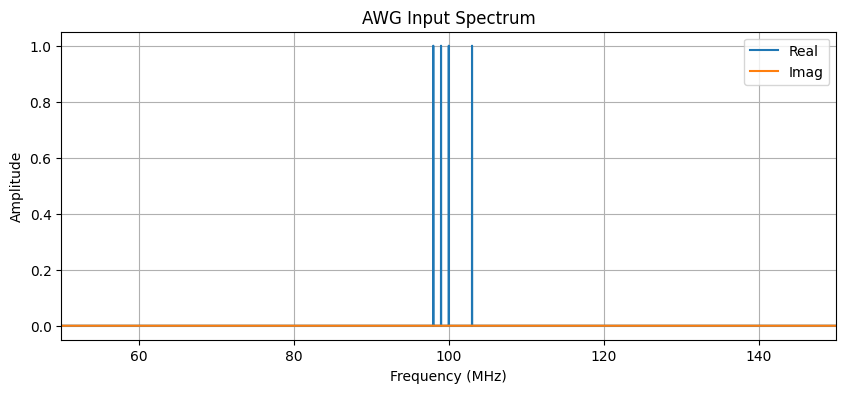

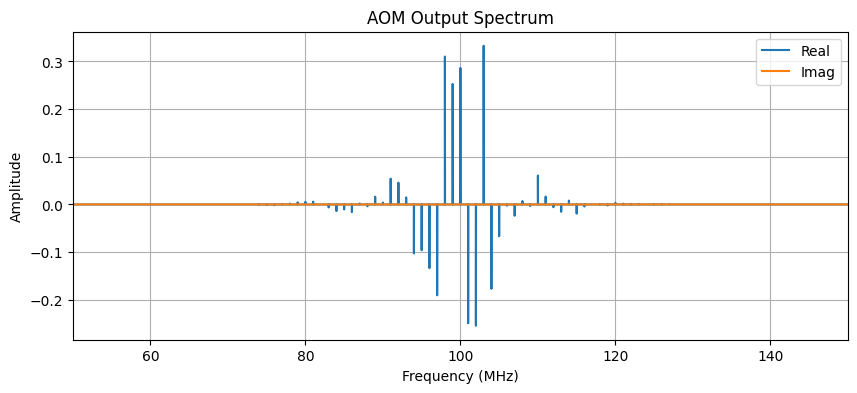

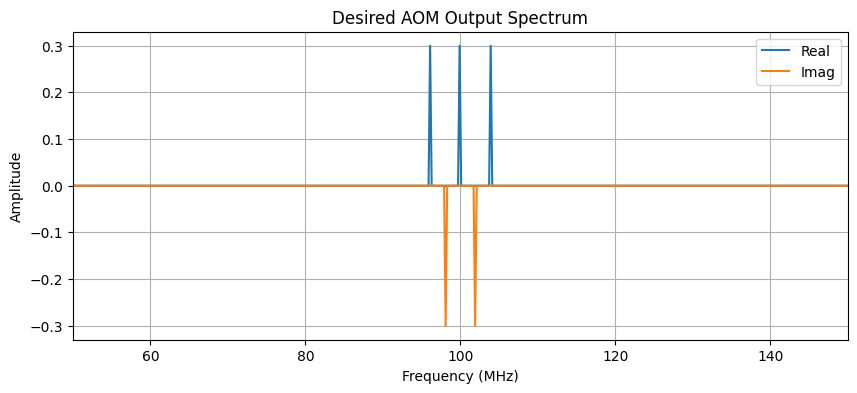

In [9]:
# FFT of FM signal
spekFM = np.fft.fft(AM) / (L / 2)
aspekFM = np.real(spekFM[:L // 2])
bspekFM = np.imag(spekFM[:L // 2])

# --- Combined plot: FM ---

# Plot
plt.figure(figsize=(10, 4))
plt.plot(f, aspekFM, label='Real')
plt.plot(f, bspekFM, label='Imag')
plt.title("AWG Input Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([50, 150])
plt.grid(True)
plt.show()

# FFT of RF signal
spekRF = np.fft.fft(RF) / (L / 2)
aspekRF = np.real(spekRF[:L // 2])
bspekRF = np.imag(spekRF[:L // 2])

# --- Combined plot: RF ---
plt.figure(figsize=(10, 4))
plt.plot(f, aspekRF, label='Real')
plt.plot(f, bspekRF, label='Imag')
plt.title("AOM Output Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([50, 150])
plt.grid(True)
plt.show()

# Example frequency array
f = np.linspace(50, 150, 500)  # 500 points from 50 to 150 MHz

# Create zero arrays for real and imaginary parts
a = np.zeros_like(f)
b = np.zeros_like(f)

# Define desired frequencies and amplitudes
target_real_freqs = [96, 100, 104]
target_imag_freqs = [98, 102]

# Set amplitudes at the indices closest to target frequencies
for freq in target_real_freqs:
    idx = (np.abs(f - freq)).argmin()
    a[idx] = 0.3

for freq in target_imag_freqs:
    idx = (np.abs(f - freq)).argmin()
    b[idx] = -0.3

# Plot
plt.figure(figsize=(10, 4))
plt.plot(f, a, label='Real')
plt.plot(f, b, label='Imag')
plt.title("Desired AOM Output Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([50, 150])
plt.grid(True)
plt.show()